In [2]:
import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
import numpy as np

In [3]:
CHANNELS = 3 #RGB
BATCH_SIZE = 16 #arbitrary
IMAGE_SIZE = 256
EPOCHS = 100



In [4]:
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "DATA/train/",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "DATA/testing/",
    shuffle = True,
    image_size = (IMAGE_SIZE,IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 176 files belonging to 2 classes.
Found 74 files belonging to 2 classes.


In [7]:
'''
def scale_resize_image(image, label):
    image = tf.image.convert_image_dtype(image, tf.float32) # equivalent to dividing image pixels by 255
    image = tf.image.resize(image, (224, 224)) # Resizing the image to 224x224 dimention
    return (image, label)
    '''


'\ndef scale_resize_image(image, label):\n    image = tf.image.convert_image_dtype(image, tf.float32) # equivalent to dividing image pixels by 255\n    image = tf.image.resize(image, (224, 224)) # Resizing the image to 224x224 dimention\n    return (image, label)\n    '

In [8]:

#train_ds = train_ds.map(scale_resize_image)
#test_ds = test_ds.map(scale_resize_image)

In [5]:
for image_batch, labels_batch in test_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(16, 256, 256, 3)
(16,)


In [6]:
val_ds = test_ds.take(len(test_ds)//2)
len(val_ds)

2

In [7]:
test_ds = test_ds.skip(len(test_ds)//2)
len(test_ds)

3

In [8]:
class_names = train_ds.class_names
class_names

['Acne', 'Eczemaa']

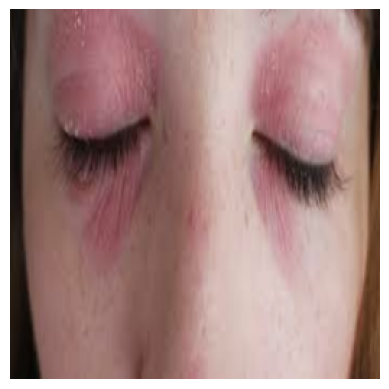

In [9]:
for image_batch, label_batch in train_ds.take(1):
    plt.imshow(image_batch[0].numpy().astype("uint8"))
    plt.axis("off")

In [10]:
train_ds



<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [11]:
test_ds

<_SkipDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [12]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)

test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)

val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size= tf.data.AUTOTUNE)

In [13]:
resize_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE,IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/((IMAGE_SIZE-1)))
    ])

data_aug = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2)

])

In [14]:
n_classes = len(class_names)
print(n_classes)

model1 = models.Sequential([
    resize_rescale,
    data_aug,
    layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (BATCH_SIZE, IMAGE_SIZE,IMAGE_SIZE, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    #layers.Conv2D(64,(3,3), activation = 'relu'),
    #layers.MaxPooling2D((2,2)),
    #layers.Conv2D(64,(3,3), activation = 'relu'),
    #layers.MaxPooling2D((2,2)),
    #layers.Conv2D(64,(3,3), activation = 'relu'),
    #layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax'),

])

2


In [19]:
model2 = models.Sequential([
    resize_rescale,
    data_aug,
    layers.Conv2D(32,(3,3), activation = 'relu', input_shape = (BATCH_SIZE, IMAGE_SIZE,IMAGE_SIZE, 3)),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64,(3,3), activation = 'relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation = 'relu'),
    layers.Dense(n_classes, activation = 'softmax'),

])

In [15]:
model1.build(input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, 3))
#model2.build(input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, 3))


In [16]:
model1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (16, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (16, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (16, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (16, 127, 127, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (16, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (16, 62, 62, 64)          0         
 g2D)                                                 

In [22]:
model2.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (16, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (16, 256, 256, 3)         0         
                                                                 
 conv2d_3 (Conv2D)           (16, 254, 254, 32)        896       
                                                                 
 max_pooling2d_3 (MaxPoolin  (16, 127, 127, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (16, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPoolin  (16, 62, 62, 64)          0         
 g2D)                                                 

In [17]:
model1.compile(optimizer = 'adam',
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
metrics = ['accuracy']
)

In [24]:
model2.compile(optimizer = 'adam',
loss = tf.keras.losses.SparseCategoricalCrossentropy(from_logits = False),
metrics = ['accuracy']
)

In [18]:
history1 = model1.fit(train_ds,
epochs = EPOCHS,
batch_size = BATCH_SIZE,
verbose = 1,
validation_data = val_ds)

Epoch 1/100
11/11 [==============================] - 4s 315ms/step - loss: 0.9859 - accuracy: 0.4886 - val_loss: 0.7024 - val_accuracy: 0.4375
Epoch 2/100
11/11 [==============================] - 3s 284ms/step - loss: 0.6990 - accuracy: 0.5000 - val_loss: 0.6947 - val_accuracy: 0.4062
Epoch 3/100
11/11 [==============================] - 3s 268ms/step - loss: 0.6918 - accuracy: 0.5170 - val_loss: 0.6931 - val_accuracy: 0.4375
Epoch 4/100
11/11 [==============================] - 3s 283ms/step - loss: 0.6813 - accuracy: 0.5568 - val_loss: 0.7112 - val_accuracy: 0.4062
Epoch 5/100
11/11 [==============================] - 3s 284ms/step - loss: 0.7119 - accuracy: 0.5511 - val_loss: 0.6735 - val_accuracy: 0.5625
Epoch 6/100
11/11 [==============================] - 3s 293ms/step - loss: 0.6842 - accuracy: 0.5455 - val_loss: 0.6973 - val_accuracy: 0.4375
Epoch 7/100
11/11 [==============================] - 3s 295ms/step - loss: 0.6813 - accuracy: 0.5398 - val_loss: 0.6783 - val_accuracy: 0.5625

In [26]:
history2 = model2.fit(train_ds,
epochs = EPOCHS,
batch_size = BATCH_SIZE,
verbose = 1,
validation_data = val_ds)

Epoch 1/100
11/11 [==============================] - 4s 319ms/step - loss: 0.7028 - accuracy: 0.4886 - val_loss: 0.6875 - val_accuracy: 0.5938
Epoch 2/100
11/11 [==============================] - 3s 306ms/step - loss: 0.6936 - accuracy: 0.5000 - val_loss: 0.6898 - val_accuracy: 0.5938
Epoch 3/100
11/11 [==============================] - 3s 307ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6895 - val_accuracy: 0.5938
Epoch 4/100
11/11 [==============================] - 3s 307ms/step - loss: 0.6934 - accuracy: 0.5000 - val_loss: 0.6859 - val_accuracy: 0.5938
Epoch 5/100
11/11 [==============================] - 3s 304ms/step - loss: 0.6908 - accuracy: 0.5625 - val_loss: 0.6667 - val_accuracy: 0.5938
Epoch 6/100
11/11 [==============================] - 3s 306ms/step - loss: 0.6888 - accuracy: 0.5114 - val_loss: 0.6877 - val_accuracy: 0.6875
Epoch 7/100
11/11 [==============================] - 3s 306ms/step - loss: 0.6817 - accuracy: 0.5625 - val_loss: 0.6286 - val_accuracy: 0.6562

In [19]:
print("[INFO] Calculating model accuracy")
scores = model1.evaluate(test_ds)
print(f"Test Accuracy: {round(scores[1],4)*100}%")


[INFO] Calculating model accuracy
3/3 [==============================] - 1s 108ms/step - loss: 0.2943 - accuracy: 0.9286
Test Accuracy: 92.86%


In [28]:
print("[INFO] Calculating model accuracy")
scores = model2.evaluate(test_ds)
print(f"Test Accuracy: {round(scores[1],4)*100}%")


[INFO] Calculating model accuracy
3/3 [==============================] - 0s 62ms/step - loss: 2.0435 - accuracy: 0.7143
Test Accuracy: 71.43%


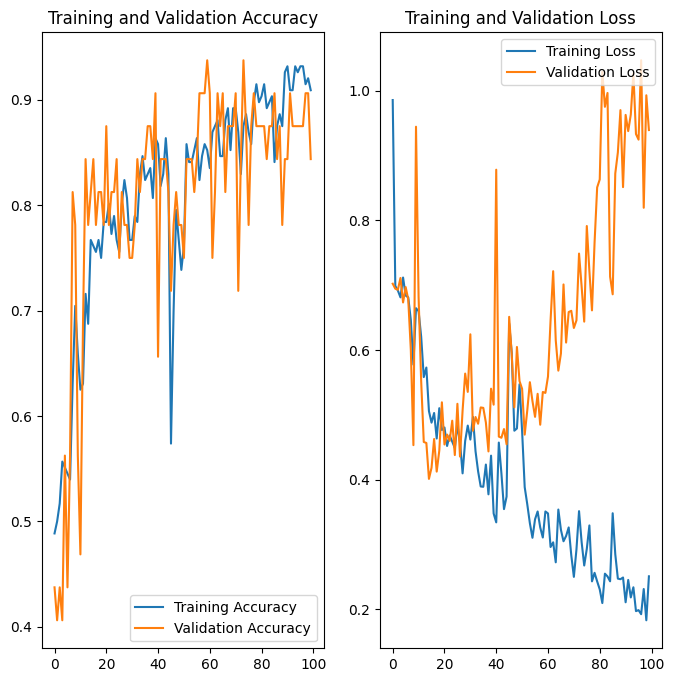

In [20]:
history = history1
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


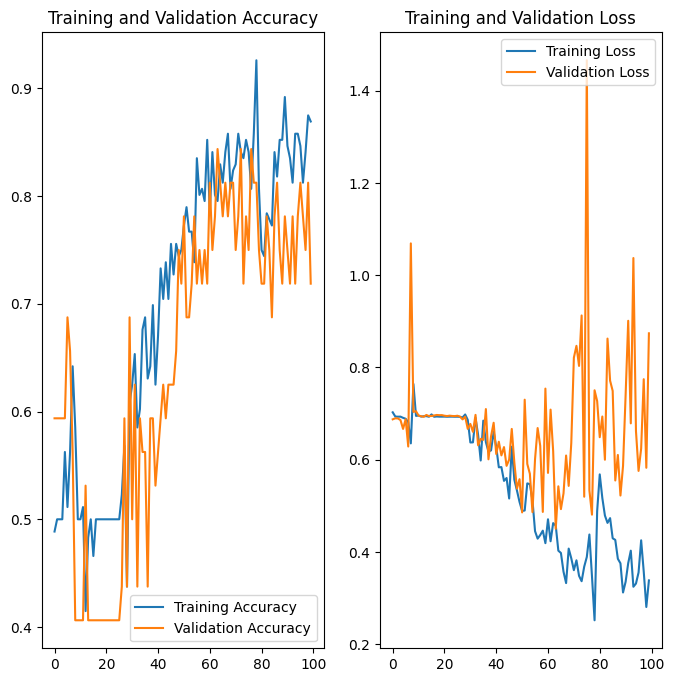

In [30]:
history = history2

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


In [34]:
import os
model_version = max([int(i) for i in (os.listdir("models")+[0])]) + 1
model1.save(f"models/{model_version}")

INFO:tensorflow:Assets written to: models/2/assets


INFO:tensorflow:Assets written to: models/2/assets


In [21]:
model1.save('skinDisease.h5')

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [22]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) # Create a batch

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

1/1 [==============================] - 0s 15ms/step


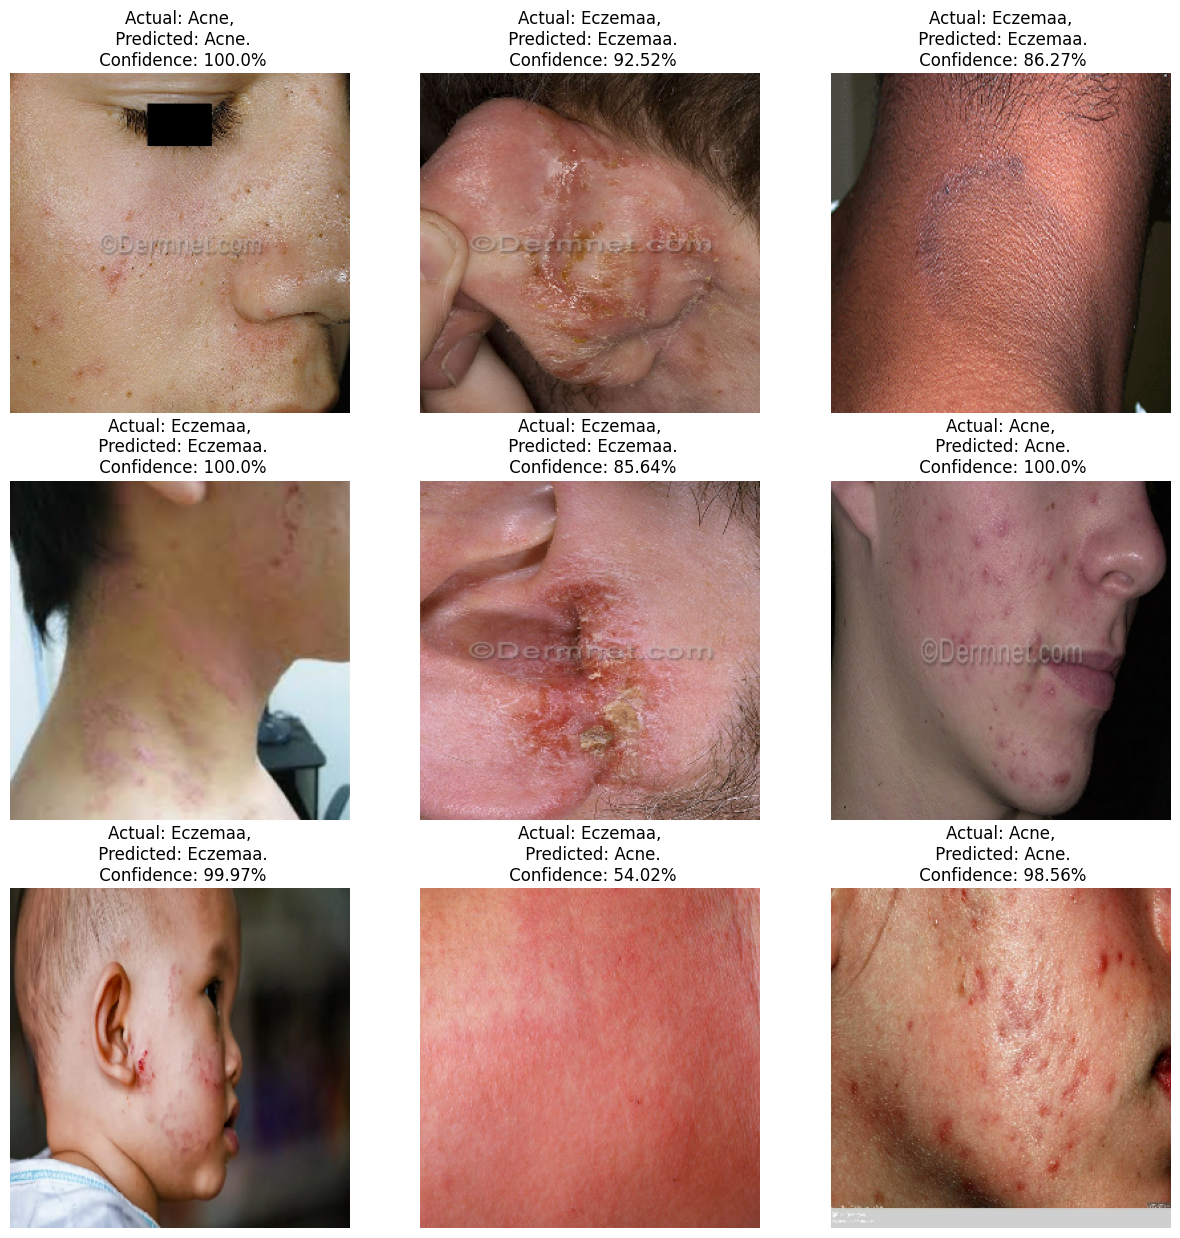

In [23]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class, confidence = predict(model1, images[i].numpy())
        
        actual_class = class_names[labels[i]] 
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")